<a href="https://colab.research.google.com/github/Ketansai11/Netflix_Stock_Price_Prediction/blob/main/Netflix_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING** THE REQUIRED LIBRARIES

In [ ]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import keras
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Dropout

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

LOADING THE DATA SET

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NFLX.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [ ]:
df.shape

(5422, 7)

In [ ]:
df.fillna(0)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
...,...,...,...,...,...,...,...
5417,2023-11-29,479.000000,480.989990,474.489990,477.190002,477.190002,2855500
5418,2023-11-30,475.309998,478.589996,470.420013,473.970001,473.970001,4287300
5419,2023-12-01,473.170013,475.230011,464.600006,465.739990,465.739990,4338100
5420,2023-12-04,460.989990,461.200012,451.200012,453.899994,453.899994,5157700


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5.422000e+03
mean,131.304057,133.340057,129.201970,131.322955,131.322955,1.594455e+07
std,172.967612,175.451082,170.335958,172.929156,172.929156,1.874197e+07
min,0.377857,0.410714,0.346429,0.372857,0.372857,2.856000e+05
25%,4.107500,4.183214,4.031786,4.112857,4.112857,5.960725e+06
50%,33.700714,34.275714,33.237858,33.833570,33.833570,1.006250e+07
75%,244.832497,250.257496,237.687497,245.152500,245.152500,1.886930e+07
max,692.349976,700.989990,686.090027,691.690002,691.690002,3.234140e+08


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5422 entries, 0 to 5421
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5422 non-null   object 
 1   Open       5422 non-null   float64
 2   High       5422 non-null   float64
 3   Low        5422 non-null   float64
 4   Close      5422 non-null   float64
 5   Adj Close  5422 non-null   float64
 6   Volume     5422 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 296.6+ KB


PLOTING FOR NETFLIX STOCKS


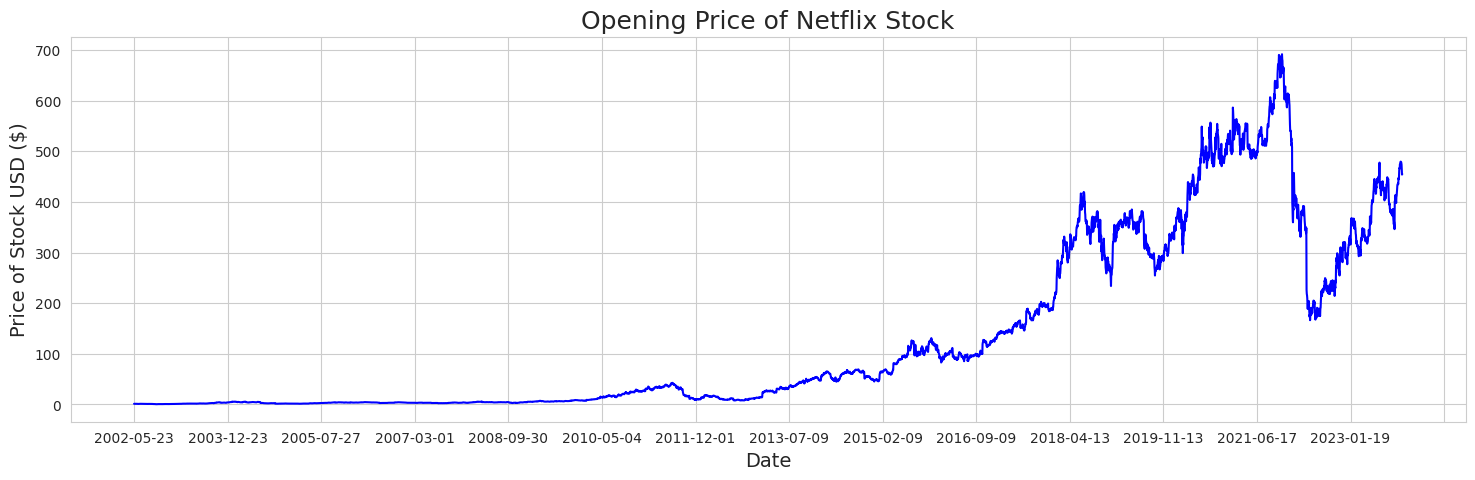

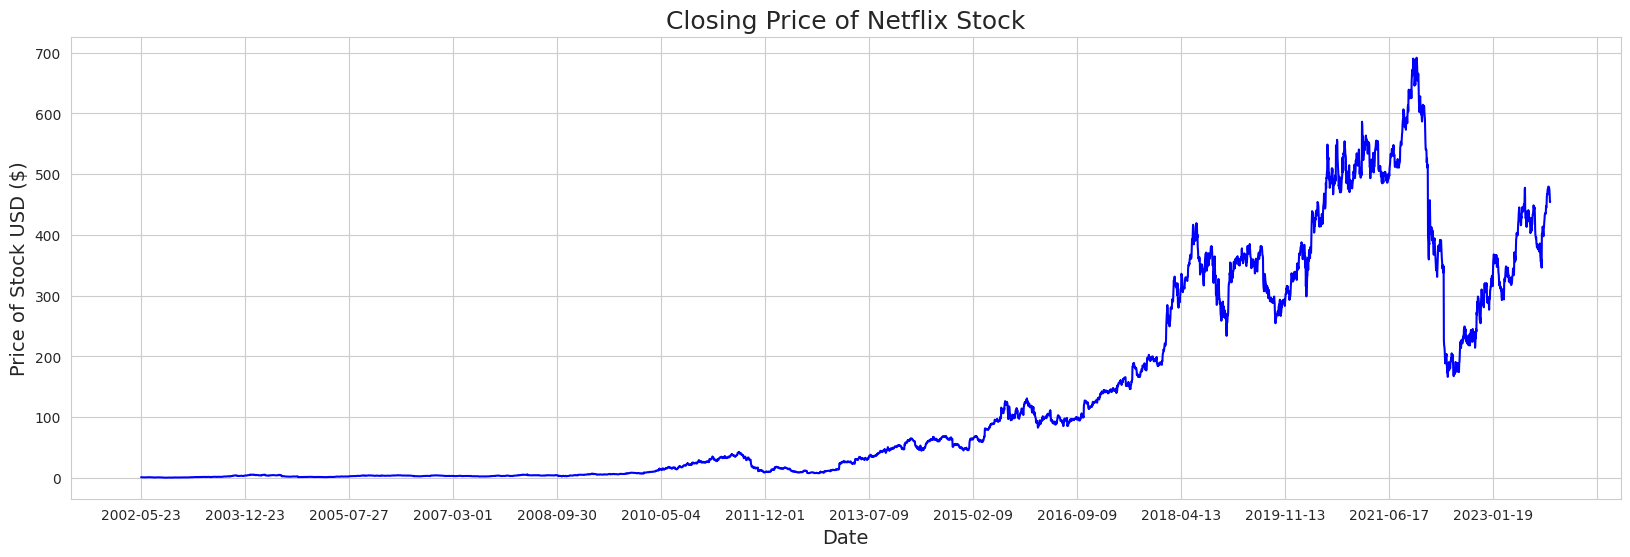

In [ ]:
# Ploting for Opening Price of Netflix
fig, ax = plt.subplots(figsize=(18, 5))
ax.plot(df['Date'], df['Close'], color='blue')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Price of Stock USD ($)', fontsize=14)
plt.title('Opening Price of Netflix Stock', fontsize=18)
plt.show()
# Ploting for Closing Price of Netflix
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(df['Date'], df['Close'], color='blue')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Price of Stock USD ($)', fontsize=14)
plt.title('Closing Price of Netflix Stock', fontsize=18)
plt.show()


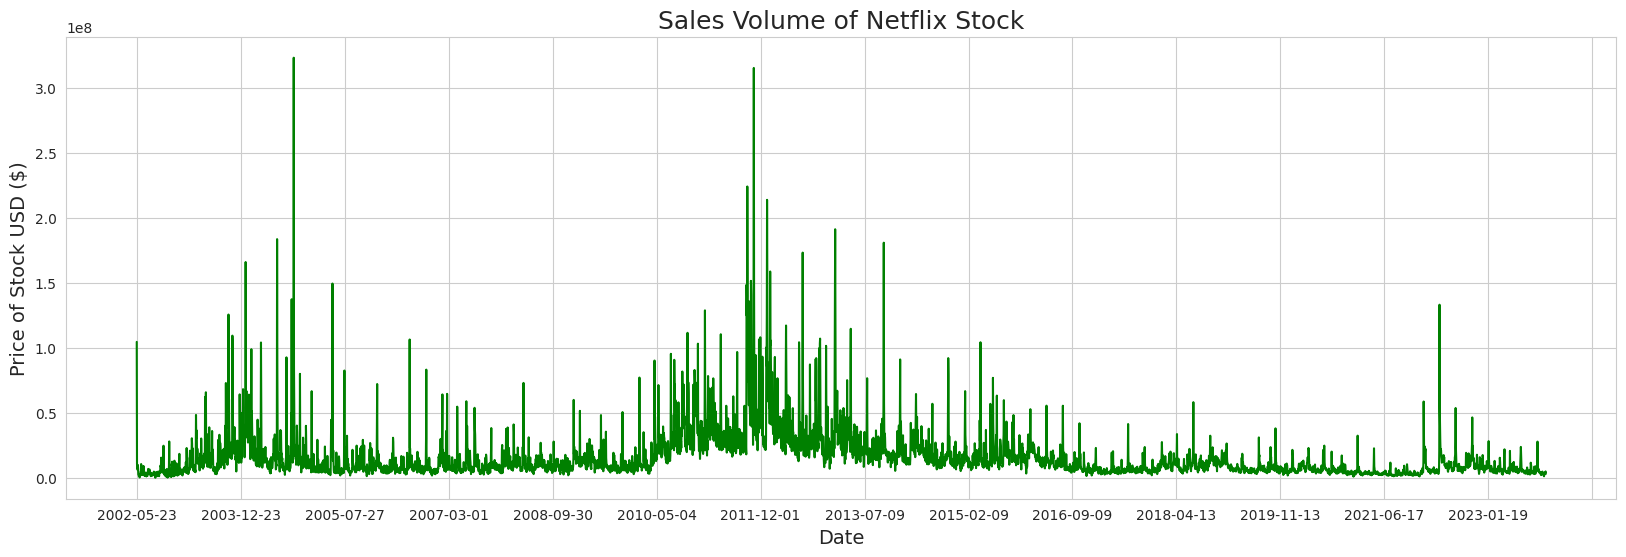

In [ ]:
#Ploting for Volume Price of Netflix
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(df['Date'], df['Volume'], color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Price of Stock USD ($)', fontsize=14)
plt.title('Sales Volume of Netflix Stock', fontsize=18)
plt.show()

Daily Volatility: 0.035550708036239734


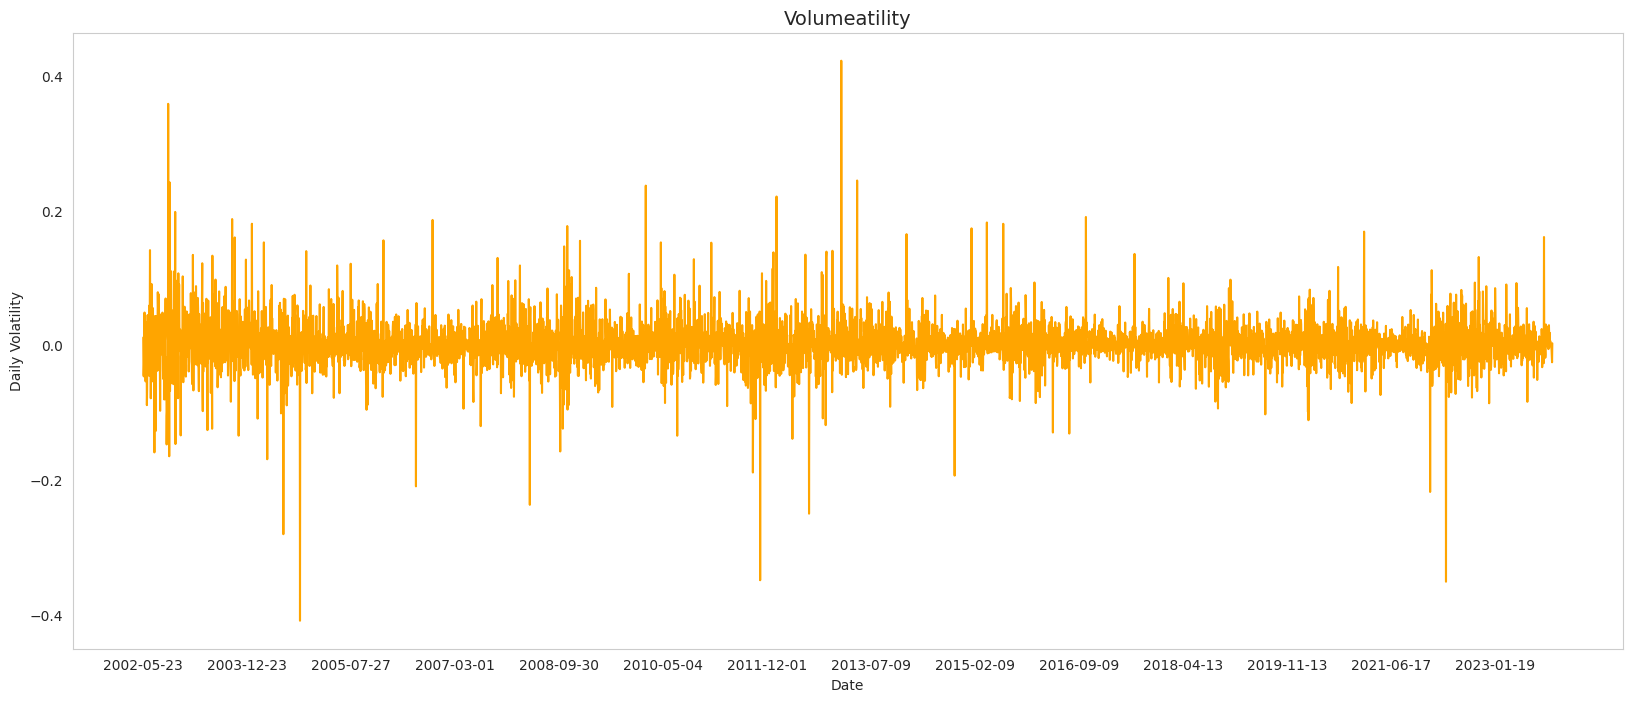

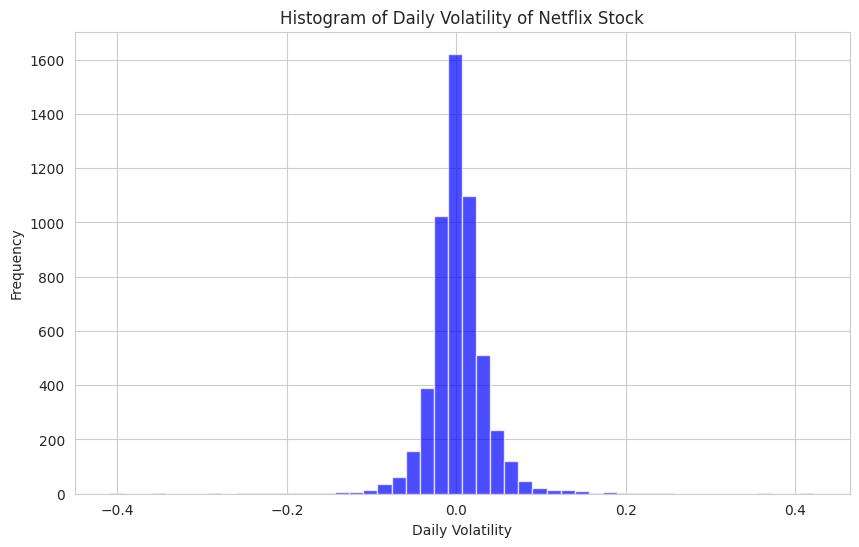

In [ ]:
df['Daily_Return'] = df['Close'].pct_change()

# Calculate the volatility (standard deviation of daily percentage changes)
daily_volatility = df['Daily_Return'].std()

print("Daily Volatility:", daily_volatility)

# Plotting the daily volatility
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(df['Date'], df['Daily_Return'], color='orange')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.xlabel('Date')
plt.ylabel('Daily Volatility')
plt.title('Volumeatility', fontsize=14)
plt.grid()
plt.show()
# Plotting the histogram of daily volatility
plt.figure(figsize=(10, 6))
plt.hist(df['Daily_Return'].dropna(), bins=50, color='blue', alpha=0.7)
plt.xlabel('Daily Volatility')
plt.ylabel('Frequency')
plt.title('Histogram of Daily Volatility of Netflix Stock')
plt.grid(True)
plt.show()

            Date  Cumulative_Return
0     2002-05-23                NaN
1     2002-05-24           0.011343
2     2002-05-28          -0.032836
3     2002-05-29          -0.077613
4     2002-05-30          -0.104478
...          ...                ...
5417  2023-11-29         397.845232
5418  2023-11-30         395.153889
5419  2023-12-01         388.275076
5420  2023-12-04         378.378964
5421  2023-12-05         379.423739

[5422 rows x 2 columns]


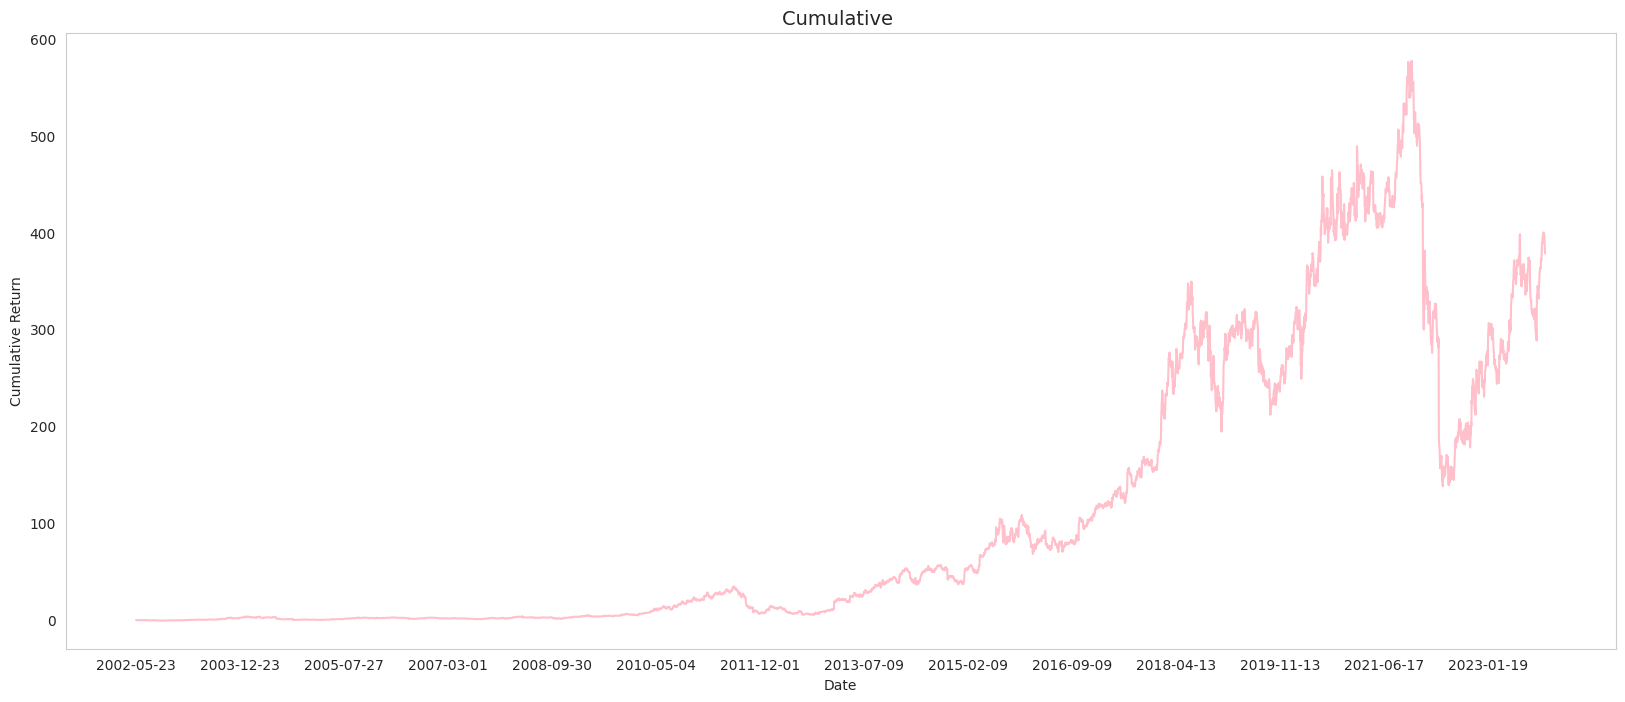

In [ ]:
# Calculate the daily percentage change in closing prices
df['Daily_Return'] = df['Close'].pct_change()

# Calculate the cumulative return
df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod() - 1

print(df[['Date', 'Cumulative_Return']])

fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(df['Date'], df['Cumulative_Return'], color='pink')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative ', fontsize=14)
plt.grid()
plt.show()

CALANDER EFFECT

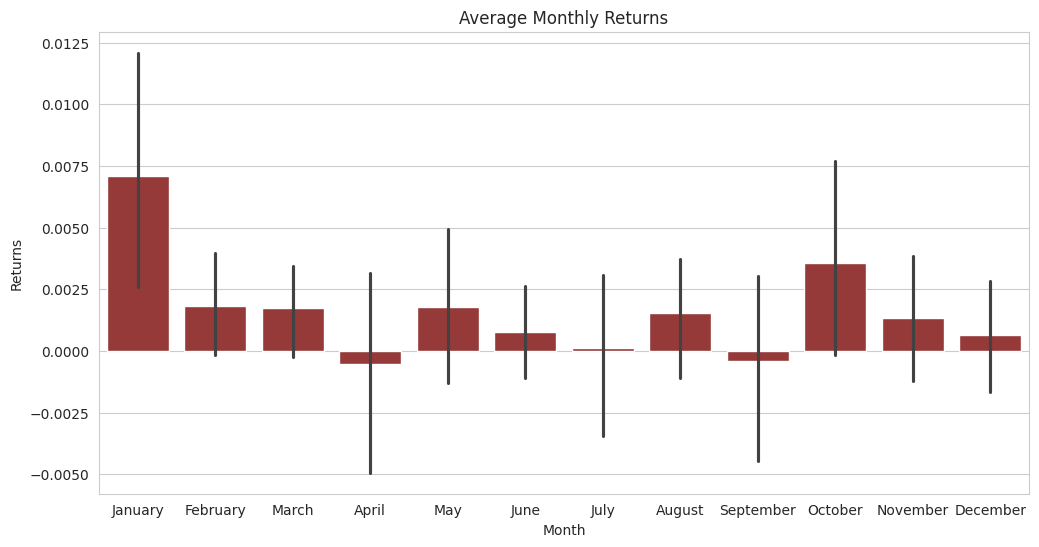

In [ ]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Calculate the daily returns
df['Return'] = df['Close'].pct_change()

# Extract the month and year from the 'Date' column
df['Month'] = df['Date'].dt.month_name()

# Group the data by month and year and calculate the average return
monthly_returns = df.groupby(['Month', df['Date'].dt.year])['Return'].mean().reset_index()

# Define the desired order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Sort the data by month order
monthly_returns['Month'] = pd.Categorical(monthly_returns['Month'], categories=month_order, ordered=True)
monthly_returns = monthly_returns.sort_values('Month')

# Create a bar plot of the average monthly returns
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_returns, x='Month', y='Return',color='brown')
plt.title('Average Monthly Returns')
plt.xlabel('Month')
plt.ylabel('Returns')
plt.show()


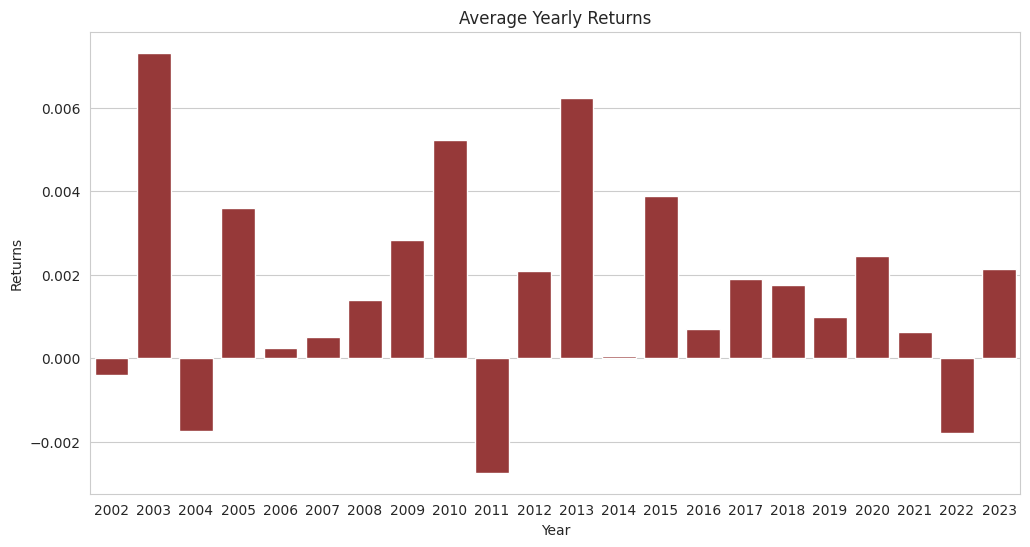

In [ ]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Calculate the daily returns
df['Return'] = df['Close'].pct_change()

# Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Group the data by year and calculate the average return
yearly_returns = df.groupby('Year')['Return'].mean().reset_index()

# Create a bar plot of the average yearly returns
plt.figure(figsize=(12, 6))
sns.barplot(data=yearly_returns, x='Year', y='Return',color='brown')
plt.title('Average Yearly Returns')
plt.xlabel('Year')
plt.ylabel('Returns')
plt.show()

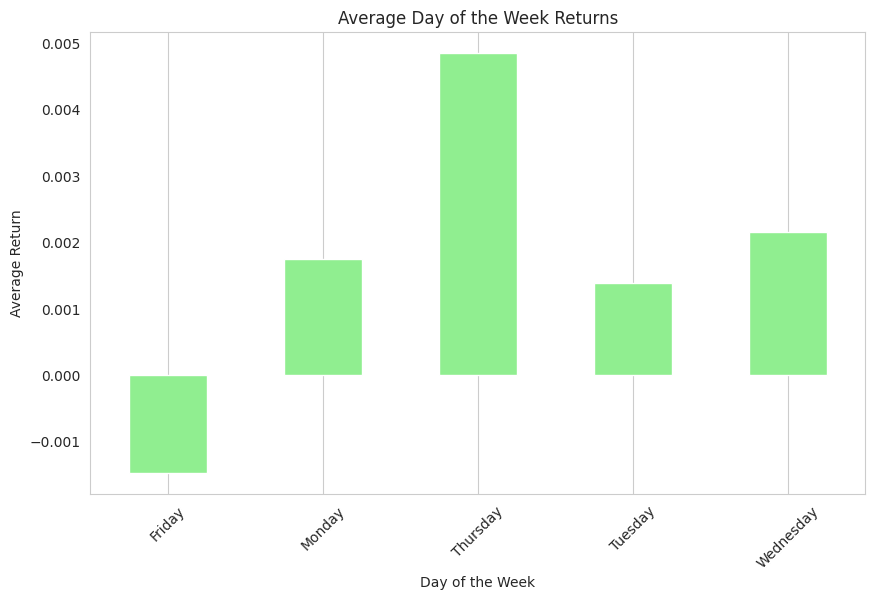

In [ ]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Calculate the daily returns
df['Return'] = df['Close'].pct_change()

# Extract the day of the week from the 'Date' column
df['Day_of_Week'] = df['Date'].dt.day_name()

# Group the data by the day of the week and calculate the average return
day_of_week_returns = df.groupby('Day_of_Week')['Return'].mean()

# Plotting the average day of the week returns
plt.figure(figsize=(10, 6))
day_of_week_returns.plot(kind='bar', color='lightgreen')
plt.xlabel('Day of the Week')
plt.ylabel('Average Return')
plt.title('Average Day of the Week Returns')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

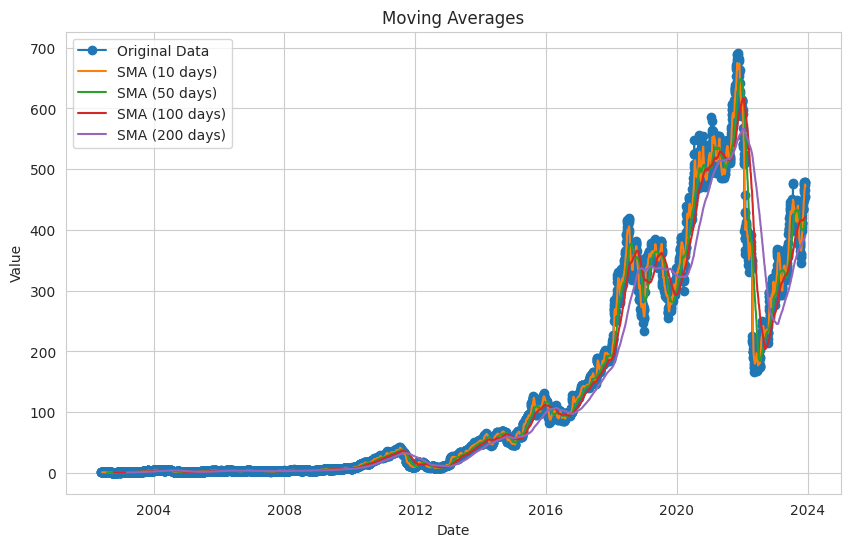

In [ ]:
# Simple Moving Average (SMA) with window size 10
sma_10 = df['Close'].rolling(window=10).mean()

# Simple Moving Average (SMA) with window size 50
sma_50 = df['Close'].rolling(window=50).mean()

# Simple Moving Average (SMA) with window size 100
sma_100 = df['Close'].rolling(window=100).mean()

# Simple Moving Average (SMA) with window size 200
sma_200 = df['Close'].rolling(window=200).mean()

# Plotting
plt.figure(figsize=(10, 6))

# Plot the original data
plt.plot(df['Date'], df['Close'], label='Original Data', marker='o')

# Plot SMA with window size 10
plt.plot(df['Date'], sma_10, label='SMA (10 days)')

# Plot SMA with window size 50
plt.plot(df['Date'], sma_50, label='SMA (50 days)')

# Plot SMA with window size 100
plt.plot(df['Date'], sma_100, label='SMA (100 days)')

# Plot SMA with window size 200
plt.plot(df['Date'], sma_200, label='SMA (200 days)')

plt.title('Moving Averages')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

NETFLIX STOCK IN 2023

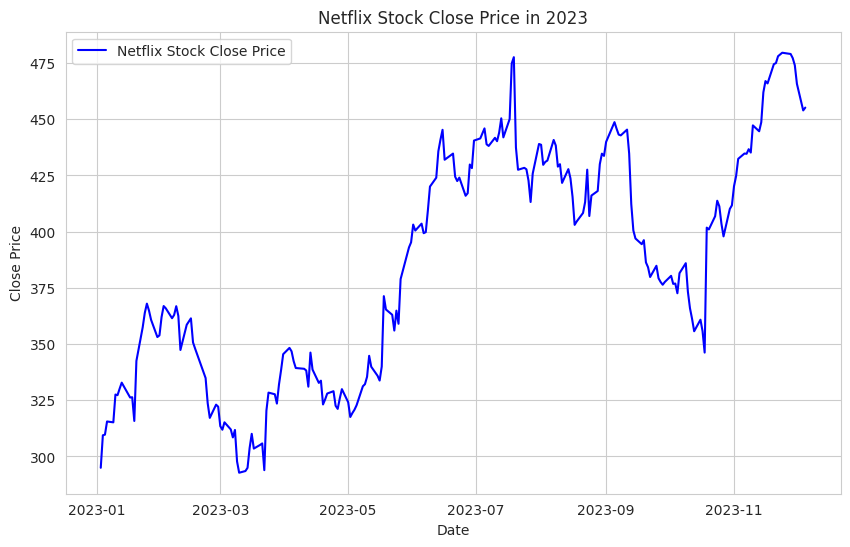

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'Date' column to datetime if it's not already in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter the data for the year 2023
df_2024 = df[df['Date'].dt.year == 2023]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_2024['Date'], df_2024['Close'], label='Netflix Stock Close Price', color='blue')
plt.title('Netflix Stock Close Price in 2023')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


DAYS OF PROFIT VS DAYS OF LOSS

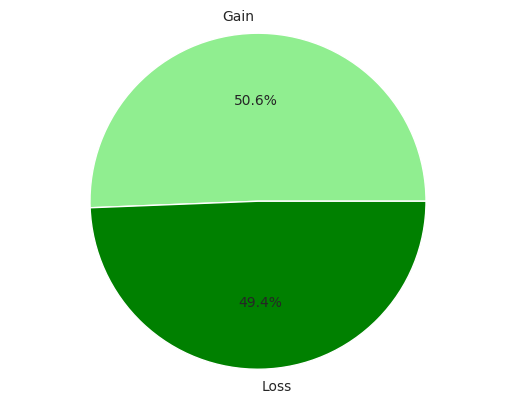

In [ ]:
# Calculate change_percent
df['change_percent'] = df['Close'].pct_change() * 100

# Count gain and loss days
gain = df[df['change_percent'] > 0]['Date'].count()
loss = df[df['change_percent'] < 0]['Date'].count()

labels = ['Gain', 'Loss']
sizes = [gain, loss]
colors = ['lightgreen', 'green']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

DATA PREPROCESSING

In [ ]:
newdf = df["Close"]
newdf = pd.DataFrame(newdf)

data = newdf.values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(data).reshape(-1, 1))

In [ ]:
train_size = int(len(data)*.70)
test_size = len(data) - train_size

print("Train Size :",train_size,"Test Size :",test_size)

train_data = scaled_data[ :train_size , 0:1 ]
test_data = scaled_data[ train_size-60: , 0:1 ]
train_data.shape, test_data.shape

Train Size : 3795 Test Size : 1627


((3795, 1), (1687, 1))

In [ ]:
# Creating a Training set with 60 time-steps and 1 output
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [ ]:
# Convert to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)
# Reshaping the input
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape , y_train.shape

((3735, 60, 1), (3735,))

LSTM MODEL

In [ ]:
#Build the model

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    LSTM(64, return_sequences= False),
    Dense(16),
    Dense(1)  # No activation function for the output layer since it's a regression task
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])  # Using 'mse' for loss and 'mae'(mean absolute error) for metrics

In [ ]:
import matplotlib.pyplot as plt

# Train the model without validation data
history = model.fit(x_train, y_train, epochs=50, batch_size=32)

# Access the training history
loss = history.history['loss']
mae = history.history['mae']
epochs = range(1, len(loss) + 1)

Epoch 1/50
117/117 [==============================] - 12s 64ms/step - loss: 2.4157e-04 - mae: 0.0067
Epoch 2/50
117/117 [==============================] - 6s 48ms/step - loss: 2.0609e-05 - mae: 0.0027
Epoch 3/50
117/117 [==============================] - 8s 68ms/step - loss: 1.8859e-05 - mae: 0.0026
Epoch 4/50
117/117 [==============================] - 6s 49ms/step - loss: 2.0462e-05 - mae: 0.0029
Epoch 5/50
117/117 [==============================] - 8s 65ms/step - loss: 1.7981e-05 - mae: 0.0027
Epoch 6/50
117/117 [==============================] - 6s 48ms/step - loss: 1.8931e-05 - mae: 0.0029
Epoch 7/50
117/117 [==============================] - 7s 60ms/step - loss: 1.6172e-05 - mae: 0.0025
Epoch 8/50
117/117 [==============================] - 6s 54ms/step - loss: 1.4782e-05 - mae: 0.0024
Epoch 9/50
117/117 [==============================] - 6s 51ms/step - loss: 1.6880e-05 - mae: 0.0027
Epoch 10/50
117/117 [==============================] - 7s 63ms/step - loss: 1.3851e-05 - mae: 0.002

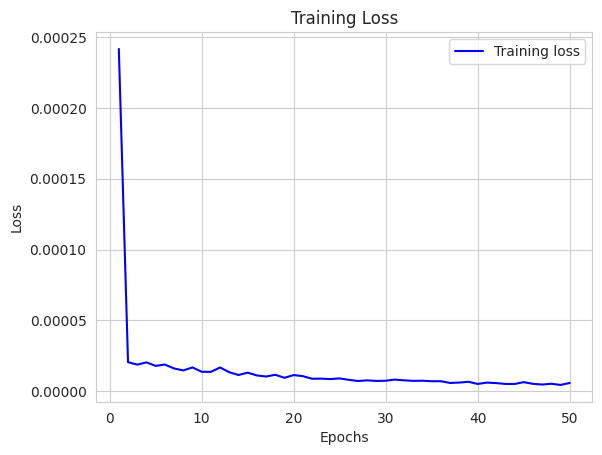

In [ ]:
# Plot training loss
plt.plot(epochs, loss, label='Training loss', color='blue')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

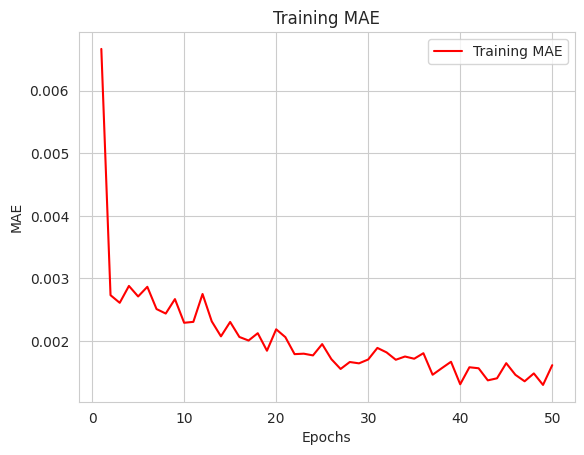

In [ ]:
# Plot training MAE
plt.plot(epochs, mae, label='Training MAE', color='red')
plt.title('Training MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.show()

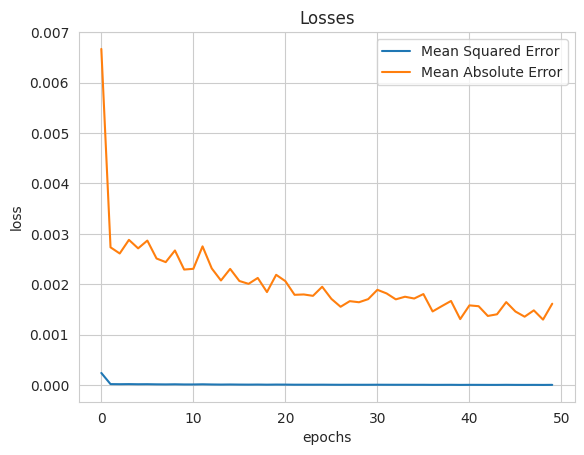

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["mae"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

PREDECTION

In [ ]:
# Creating a testing set with 60 time-steps and 1 output
x_test = []
y_test = []

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#inverse y_test scaling
predictions = model.predict(x_test)

#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

51/51 [==============================] - 2s 16ms/step


(1627, 1)

In [ ]:
# Reshape y_test to a 2D array
y_test_reshaped = y_test.reshape(-1, 1)

# Apply inverse_transform to the reshaped y_test
y_test_actual = scaler.inverse_transform(y_test_reshaped)

# Calculate RMSE
RMSE = np.sqrt(np.mean((y_test_actual - predictions)**2)).round(2)
RMSE

13.86

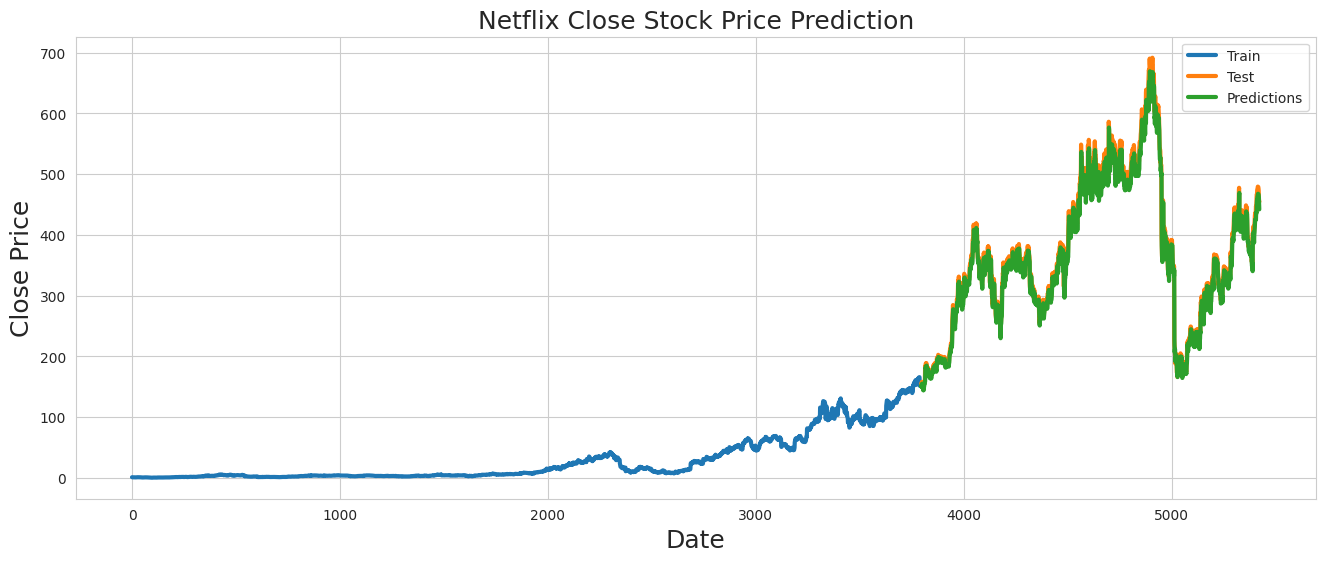

In [ ]:
train = newdf.iloc[:train_size , 0:1]
test = newdf.iloc[train_size: , 0:1]
test['Predictions'] = predictions

plt.figure(figsize= (16, 6))
plt.title('Netflix Close Stock Price Prediction', fontsize= 18)
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Close Price', fontsize= 18)
plt.plot(train['Close'], linewidth= 3)
plt.plot(test['Close'], linewidth= 3)
plt.plot(test["Predictions"], linewidth= 3)
plt.legend(['Train', 'Test', 'Predictions'])

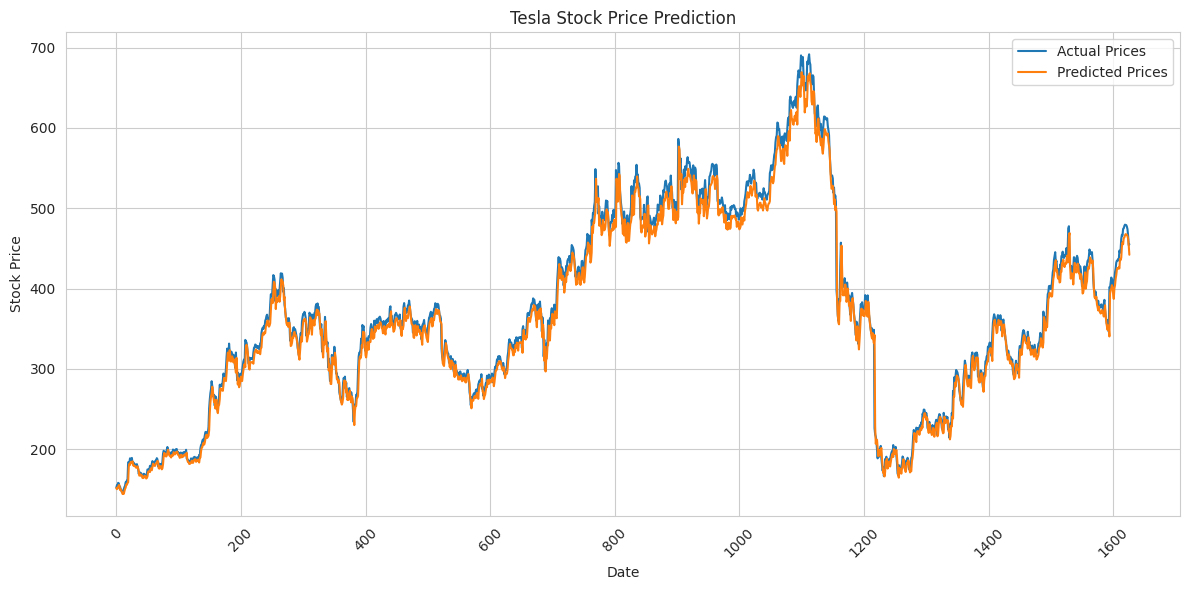

In [ ]:
# Plot the actual vs. predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()  # Adjust layout to prevent overlap of labels
plt.show()